# De wetenschap achter het winnen van een tenniswedstrijd

Studenten: Robin Flier, Casper Smeets, Sjoerd Takken, Jip Voshol

Team nummer: G3

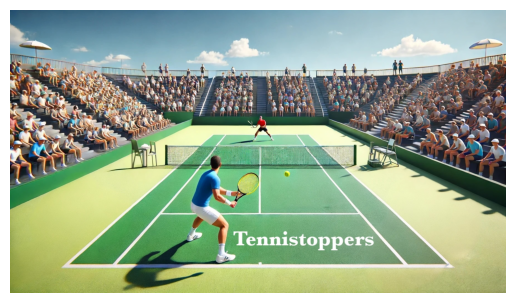

In [207]:
from PIL import Image
import matplotlib.pyplot as plt

# Voer het pad naar je afbeelding in
image_path = '../images/tennisveld.jpg'

# Open de afbeelding met Pillow
image = Image.open(image_path)

# Gebruik matplotlib om de afbeelding te tonen
plt.imshow(image)
plt.axis('off')  # Verberg de assen
plt.show()


## Introductie

In de wereld van tennis wordt succes vaak afgemeten aan overwinningen en prestaties op het veld. De weg naar een overwinning is echter een complexe mix van zowel aangeboren als aangeleerde eigenschappen. Tennis, een sport waarbij zowel fysieke bekwaamheid als mentale weerbaarheid centraal staan, biedt een rijke dataset om te onderzoeken welke factoren de uitkomsten van wedstrijden beïnvloeden. Dit project verdeelt deze factoren in twee categorieën: aangeboren eigenschappen en aangeleerde vaardigheden.

Aangeboren eigenschappen omvatten kenmerken zoals afkomst, leeftijd, speelhand en lichaamslengte. Deze factoren zijn inherent aan de speler en niet beïnvloedbaar door training of ervaring. Hoewel deze eigenschappen op het eerste gezicht misschien een vaste rol spelen, zullen we onderzoeken in hoeverre ze de prestaties op het veld echt beïnvloeden.

Aan de andere kant staan de aangeleerde eigenschappen: vaardigheden en tactieken die spelers kunnen ontwikkelen door training en wedstrijdervaring. Hier kijken we naar aspecten zoals het aantal aces, de tijdsduur van de wedstrijd en het aantal dubbele fouten. Deze elementen zijn cruciaal omdat ze directe indicatoren zijn van zowel technische bekwaamheid als mentale scherpte tijdens de wedstrijd.

Onze analyse zal deze variabelen zowel afzonderlijk als in combinatie bestuderen om te bepalen welke het meest bepalend zijn voor succes in tenniswedstrijden. We zullen ook de verschillen tussen mannen en vrouwen in deze aspecten verkennen, om eventuele unieke strategieën of trends in speelstijlen te identificeren die kunnen verschillen per geslacht.

## Dataset en Preprocessing

<strong>De code verwerkt twee verschillende tennis datasets (ATP voor mannen en WTA voor vrouwen), combineert ze en slaat de gecombineerde dataset op</strong>. 

<i>De stappen zijn als volgt</i>: 

1. <b>Datasets laden</b>: De ATP- en WTA-datasets worden ingeladen vanuit CSV-bestanden. 

2. <b>Preprocessingsfunctie definiëren</b>: 
- Kolommen verwijderen: Bepaalde (belangrijke) kolommen die voor een erg groot deel ontbreken, worden verwijderd. 
- Datum conversie: De kolom 'tourney_date' wordt omgezet naar een datetime-formaat.
 - Verwijderen van rijen met ontbrekende waarden: Rijen met ontbrekende waarden in de kolommen 'winner_age', 'loser_age', 'winner_ht' of 'loser_ht' worden verwijderd.
 - Leeftijdskolommen omzetten: De 'winner_age' en 'loser_age' kolommen worden omgezet naar numerieke waarden, waarbij eventuele komma's worden vervangen door punten. 
- Geslachtskolom toevoegen: Een nieuwe kolom 'gender' wordt toegevoegd aan de dataset zodat de twee datasets kunnen worden gecombineerd, maar tegelijkertijd de onderscheid tussen man/vrouw gemaakt kan worden.

3. <b>Functie toepassen</b>: De preprocessingsfunctie wordt toegepast op zowel de ATP- als de WTA-dataset. Daarnaast bestond de WTA dataset alleen uit wedstrijden uit 2022, terwijl de ATP meerdere jaren bevatte. We hebben ervoor gekozen die dataset ook te beperken tot het jaar 2022. Verder waren de datasets wat betreft de kolommen zeer gelijk, dus geschikt om te combineren.

4. <b>Datasets combineren</b>: De schoongemaakte ATP- en WTA-datasets worden gecombineerd tot één dataset.

5. <b>Gecombineerde dataset opslaan</b>: De gecombineerde dataset wordt opgeslagen in een nieuw CSV-bestand.


## Eerste perspectief: lichamelijke kenmerken

Het eerste perspectief geeft inzicht in de relatie tussen kichamelijke kenmerken van sporters en hun winkansen. We zullen hierbij kijken naar lichamelijke kenmerken zoals de lengte van de speler, de voorkeurshand, afkomst en leeftijd. Deze variabelen zullen vervolgens vergeleken worden met de wedstrijdresultaten om te kijken wat de optimale lichamelijke waardes zijn voor het winnen van een wedstrijd.

.....

### Eerste argument eerste perspectief

Hier komt argument 1

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random


# Load the dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Stel dat we geslachtscategorieën hebben; anders, genereer gesimuleerde data
df['gender'] = np.random.choice(['Male', 'Female'], df.shape[0])

# Stel dat we een kolom voor lengte hebben; anders, genereer gesimuleerde data
df['height'] = np.random.normal(180, 10, df.shape[0])

# Set the style for seaborn
sns.set(style="whitegrid")

Text(0, 0.5, 'Average Aces')

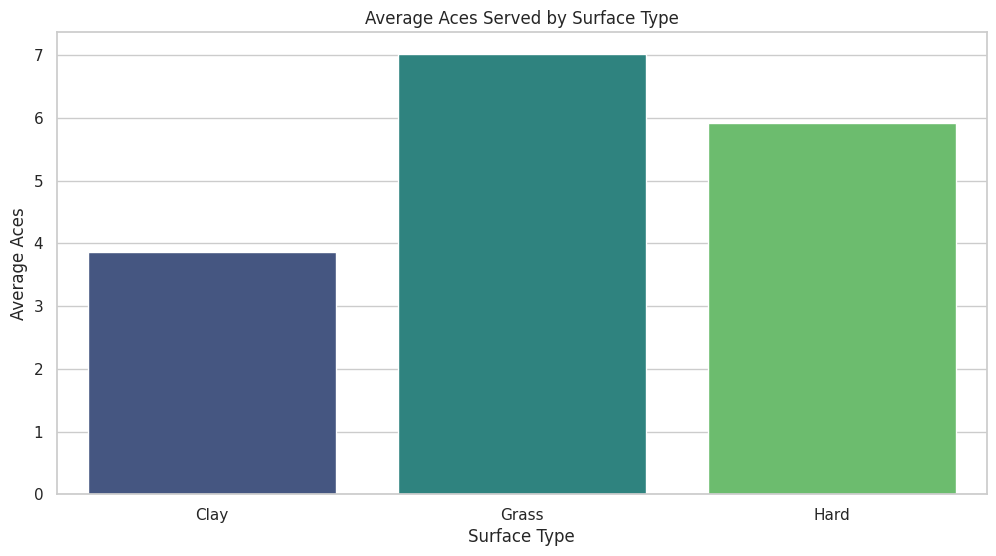

In [223]:
# 1. Average Aces by Surface Type
aces_per_surface = df.groupby('surface')['w_ace'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=aces_per_surface.index, y=aces_per_surface.values, palette='viridis', hue=aces_per_surface.index)
plt.title('Average Aces Served by Surface Type')
plt.xlabel('Surface Type')
plt.ylabel('Average Aces')



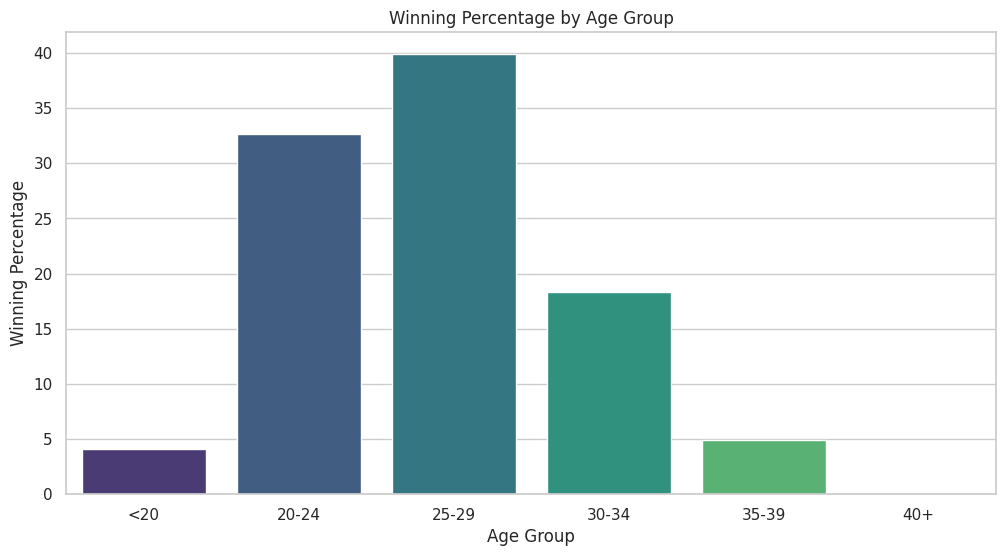

In [210]:
# Voeg leeftijdsgroepen toe
age_bins = [0, 20, 25, 30, 35, 40, 100]
age_labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40+']
df['winner_age_group'] = pd.cut(df['winner_age'], bins=age_bins, labels=age_labels, right=False)
df['loser_age_group'] = pd.cut(df['loser_age'], bins=age_bins, labels=age_labels, right=False)

# Win Percentage by Age Group
win_percentage_by_age_group = df['winner_age_group'].value_counts(normalize=True) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=win_percentage_by_age_group.index, y=win_percentage_by_age_group.values, palette='viridis', hue=win_percentage_by_age_group.index)
plt.title('Winning Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Winning Percentage')
plt.show()

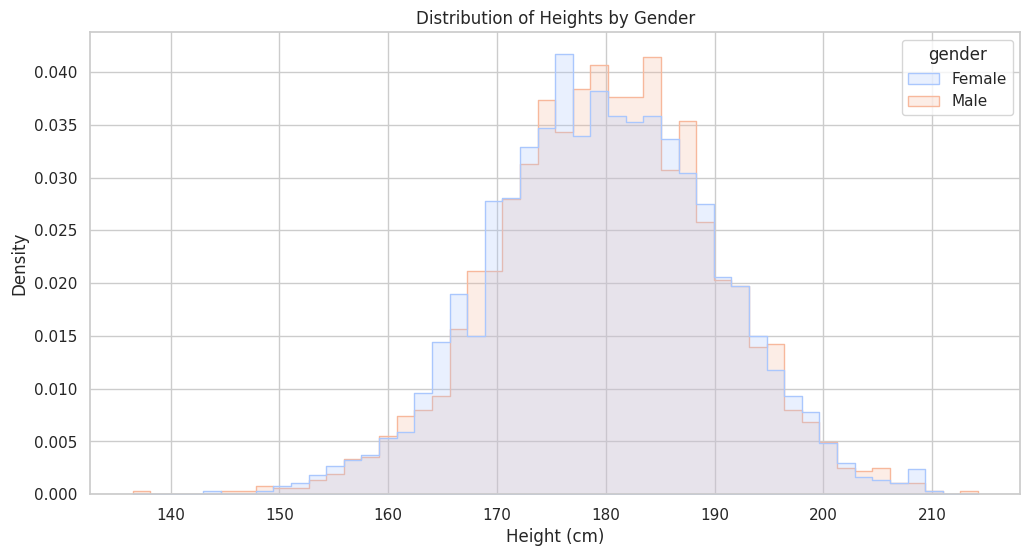

In [211]:
# Lengtegroepen definieert
height_bins = range(150, 210, 5)  # Van 150cm tot 210cm met stappen van 5cm
df['height_group'] = pd.cut(df['height'], bins=height_bins)

# 1. Distributie van Lengte voor Mannen en Vrouwen
plt.figure(figsize=(12, 6))
sns.histplot(df, x='height', hue='gender', element='step', stat='density', common_norm=False, palette='coolwarm')
plt.title('Distribution of Heights by Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

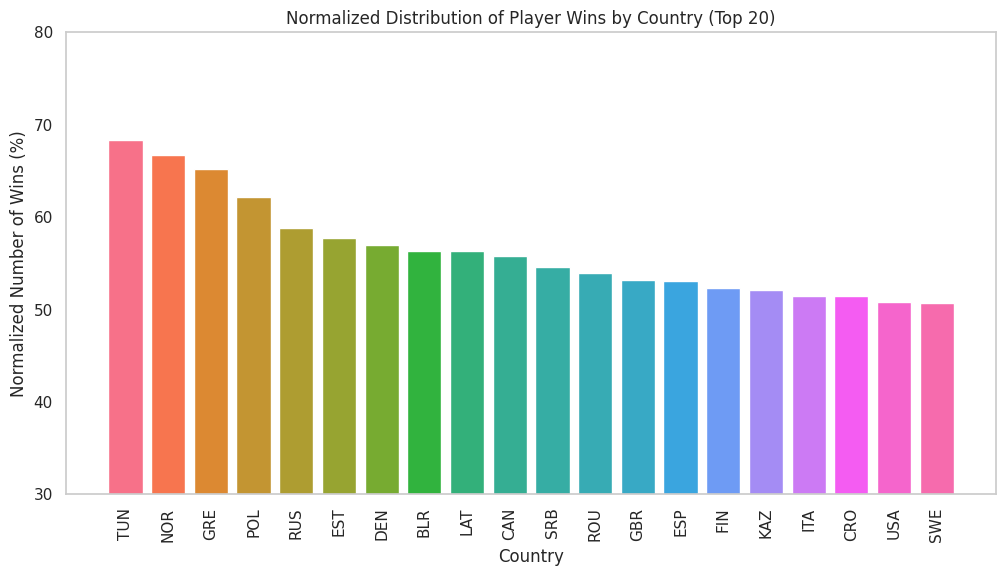

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Bereken het aantal gewonnen wedstrijden per land
country_wins = df['winner_ioc'].value_counts()

# Bereken het totale aantal wedstrijden per land (winnaar en verliezer)
total_matches_per_country = df['winner_ioc'].value_counts() + df['loser_ioc'].value_counts()

# Genormaliseerde verdeling van overwinningen per land
normalized_wins = (country_wins / total_matches_per_country).dropna()

# Sorteer de genormaliseerde waarden
normalized_wins = normalized_wins.sort_values(ascending=False).head(20)

# Functie om de vlagafbeelding te laden
def get_flag(country_code):
    file_path = f"flags/{country_code.lower()}.png"
    if os.path.exists(file_path):
        return plt.imread(file_path)
    else:
        return None

# Definieer een kleurenpalet
colors = sns.color_palette('husl', len(normalized_wins))

# Plotten van de resultaten
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(normalized_wins.index, normalized_wins.values * 100, color=colors)  # Omzetten naar percentages
plt.title('Normalized Distribution of Player Wins by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Normalized Number of Wins (%)')
plt.xticks(rotation=90)
ax.set_ylim(30, 80)  # Instellen van het bereik van de y-as
ax.grid(False)  # Verwijderen van de grid

# Voeg vlaggen toe aan de grafiek
for bar, country_code in zip(bars, normalized_wins.index):
    flag_image = get_flag(country_code)
    if flag_image is not None:
        imagebox = OffsetImage(flag_image, zoom=0.1)
        ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                            frameon=False, box_alignment=(0.5, 0))
        ax.add_artist(ab)

plt.show()


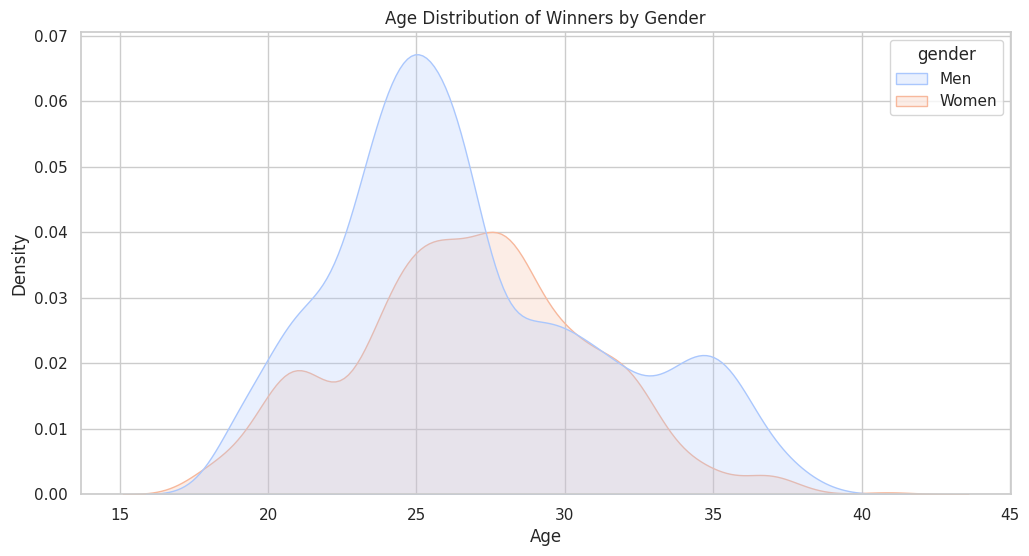

In [213]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='winner_age', hue='gender', palette='coolwarm', fill=True)
plt.title('Age Distribution of Winners by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

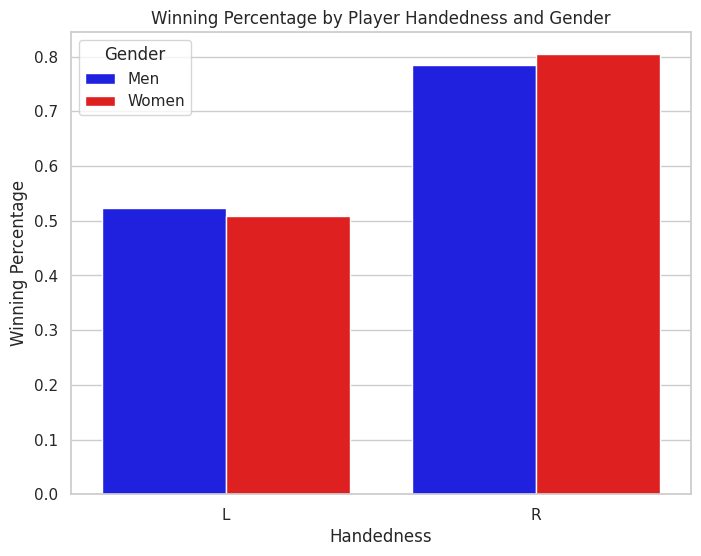

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laad de dataset
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Filter de data op 'R' en 'L'
filtered_data = df[df['winner_hand'].isin(['R', 'L'])]

# Bereken winstpercentages voor 'R' en 'L' met een splitsing op geslacht
win_counts = filtered_data.groupby(['winner_hand', 'gender']).size()
total_matches = filtered_data.groupby(['winner_hand', 'gender']).size() + filtered_data.groupby(['loser_hand', 'gender']).size()

# Creëer een DataFrame voor winstpercentages
win_percentage = (win_counts / total_matches).reset_index(name='Winning Percentage')

# Plotten van de winstpercentages
plt.figure(figsize=(8, 6))
palette = {'Men': 'blue', 'Women': 'red'}  # Mannen in blauw, vrouwen in rood
sns.barplot(x='winner_hand', y='Winning Percentage', hue='gender', data=win_percentage, palette=palette, errorbar=None)

plt.title('Winning Percentage by Player Handedness and Gender')
plt.xlabel('Handedness')
plt.ylabel('Winning Percentage')
plt.legend(title='Gender')

# Verwijder verticale gridlijnen
plt.grid(False)  # Schakelt alle grids uit
plt.gca().yaxis.grid(True)  # Schakel alleen het Y-grid in
plt.gca().xaxis.grid(False)  # Zorgt ervoor dat X-grid uitgeschakeld blijft

plt.show()


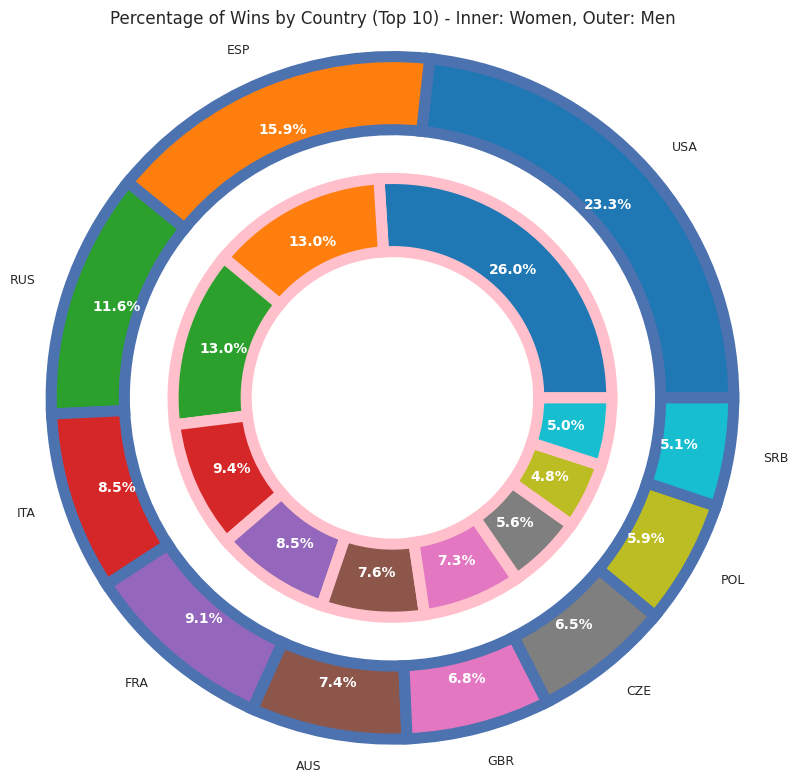

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data laden
df = pd.read_csv('../combined_cleaned_tennis_data.csv')

# Simuleer geslachtsdata en winst/verlies
np.random.seed(0)
df['gender'] = np.random.choice(['Women', 'Men'], size=len(df))
df['result'] = np.random.choice(['win', 'loss'], size=len(df))

# Overwinningen per geslacht en land filteren
wins = df[(df['result'] == 'win')]

# Overwinningen per geslacht en land tellen
wins_per_country_gender = wins.groupby(['winner_ioc', 'gender']).size().unstack(fill_value=0)

# Top 10 landen met de meeste overwinningen selecteren
top_countries = wins_per_country_gender.sum(axis=1).nlargest(10).index
top_wins_per_country_gender = wins_per_country_gender.loc[top_countries]

# Kleurenpaletten
cmap = sns.color_palette("tab10", n_colors=20)

fig, ax = plt.subplots(figsize=(12, 8))

# Buitenste ring
wedges, texts, autotexts = ax.pie(top_wins_per_country_gender['Men'], radius=1.4, labels=top_wins_per_country_gender.index, colors=cmap, wedgeprops=dict(width=0.3, edgecolor='b', linewidth=8), autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.1)
plt.setp(texts, size=9)
plt.setp(autotexts, size=10, weight="bold", color='white')

# Binnenste ring
wedges, texts, autotexts = ax.pie(top_wins_per_country_gender['Women'], radius=0.9, colors=cmap, wedgeprops=dict(width=0.3, edgecolor='pink', linewidth=8), autopct='%1.1f%%', pctdistance=0.8)
plt.setp(autotexts, size=10, weight="bold", color='white')

# Pas de titel en layout aan
ax.set(aspect="equal")
plt.title('Percentage of Wins by Country (Top 10) - Inner: Women, Outer: Men', pad=50)
plt.tight_layout()
plt.show()


In [216]:
import pandas as pd
import plotly.express as px
import numpy as np

data = pd.read_csv('../combined_cleaned_tennis_data.csv')

grouped_winnaars = data.groupby(['w_ace', 'w_df']).size().reset_index(name='frequency')
grouped_verliezers = data.groupby(['l_ace', 'l_df']).size().reset_index(name='frequency')

grouped_winnaars['adjusted_size'] = np.sqrt(grouped_winnaars['frequency']) * 10 / (1 + 0.1 * grouped_winnaars['w_ace'] + 0.1 * grouped_winnaars['w_df'])
grouped_verliezers['adjusted_size'] = np.sqrt(grouped_verliezers['frequency']) * 10 / (1 + 0.1 * grouped_verliezers['l_ace'] + 0.1 * grouped_verliezers['l_df'])

fig_winnaars = px.scatter(grouped_winnaars,
                          x='w_ace',
                          y='w_df',
                          size='adjusted_size',
                          color='frequency',
                          hover_data={'frequency': True, 'w_ace': True, 'w_df': True, 'adjusted_size': False},
                          title='Bubble Plot Aces vs. Dubbele Fouten (Winnaars)',
                          labels={'w_ace': 'Aantal Aces', 'w_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                          size_max=22,
                          opacity=0.8,
                          color_continuous_scale=px.colors.sequential.Viridis)

fig_winnaars.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_winnaars.update_layout(plot_bgcolor='white', 
                           xaxis=dict(title='Aantal Aces', range=[-1, 41]),
                           yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21]),
                           margin=dict(l=20, r=20, t=60, b=20))

fig_verliezers = px.scatter(grouped_verliezers,
                            x='l_ace',
                            y='l_df',
                            size='adjusted_size',
                            color='frequency',
                            hover_data={'frequency': True, 'l_ace': True, 'l_df': True, 'adjusted_size': False},
                            title='Bubble Plot Aces vs. Dubbele Fouten (Verliezers)',
                            labels={'l_ace': 'Aantal Aces', 'l_df': 'Aantal Dubbele Fouten', 'frequency': 'Frequentie'},
                            size_max=22,
                            opacity=0.8,
                            color_continuous_scale=px.colors.sequential.Viridis)

fig_verliezers.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig_verliezers.update_layout(plot_bgcolor='white', 
                             xaxis=dict(title='Aantal Aces', range=[-1, 41]),
                             yaxis=dict(title='Aantal Dubbele Fouten', range=[-1, 21]),
                             margin=dict(l=20, r=20, t=60, b=20))

fig_winnaars.show()
fig_verliezers.show()

In [217]:
import pandas as pd
import plotly.express as px


tennis_data = pd.read_csv('../combined_cleaned_tennis_data.csv')

rank_sum_per_country = tennis_data.groupby('winner_ioc')['winner_rank'].sum().reset_index()
rank_count_per_country = tennis_data.groupby('winner_ioc')['winner_rank'].count().reset_index()

rank_data = pd.merge(rank_sum_per_country, rank_count_per_country, on='winner_ioc')
rank_data.columns = ['Land', 'Total_Rank', 'Player_Count']

rank_data['Gemiddelde Rank'] = rank_data['Total_Rank'] / rank_data['Player_Count']

average_rank_per_country = rank_data[['Land', 'Gemiddelde Rank']]

fig = px.choropleth(
    average_rank_per_country,
    locations="Land",
    locationmode="ISO-3",
    color="Gemiddelde Rank",
    hover_name="Land",
    hover_data=["Gemiddelde Rank"],
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Gemiddelde Rank Per Land"
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title="Gemiddelde Rank"
    )
)

fig.show()

> *Figuur 1: Toelichting figuur*

toelichting argument

In [218]:
# code figuur 2
print('figuur 2')

figuur 2


> *Figuur 2: Toelichting figuur*

Laatste stuk toelichting argument 1

### Tweede argument eerste perspectief

argument 2

In [219]:
# code voor figuur 3
print('figuur 3')

figuur 3


> *Figuur 3: Toelichting figuur*

laatste stuk arugment 2: hieruit blijkt dat

## Tweede perspectief

Bij het tweede perspectief richten we ons op de winkansen van tennisspelers door een analyse van kenmerken die door training beïnvloed kunnen worden. Het doel is om te identificeren welke trainbare variabelen een significante invloed hebben op de uitkomst van wedstrijden. We focussen ons op statistieken zoals speelduur, aantal aces, aantal dubbele fouten, en het percentage eerste services die in zijn. Deze variabelen zijn essentieel omdat ze direct gerelateerd zijn aan de vaardigheden en voorbereiding van de spelers.

We gaan deze gegevens gebruiken om te ontdekken welke trainingselementen echt het verschil maken in wedstrijden. Dit is niet alleen handig voor coaches en spelers om hun trainingen beter te plannen, maar geeft ons ook meer inzicht in hoe bepaalde oefeningen bijdragen aan succes op de baan. Uiteindelijk kan dit onderzoek leiden tot slimmere trainingsplannen die spelers helpen beter te presteren en vaker te winnen.

### Eerste argument tweede perspectief

argument 1

In [220]:
# code figuur 4
print('figuur 4')

figuur 4


> *Figuur 4: Toelichting figuur*

laatste stuk argument 1

### Tweede argument tweede perspectief

argument 2

In [221]:
# code voor figuur 5
print('figuur 5')

figuur 5


> *Figuur 5: Toelichting figuur*

meer argument of toelichting

In [222]:
# code voor figuur 6
print('figuur 6')

figuur 6


> *Figuur 6: Toelichting figuur*

## Reflectie

Zo vonden wij het project.

## Werkverdeling

### Samen
Dit hebben wij samen gedaan
### Sjoerd
Sjoerd heeft 
### Casper
Casper heeft
### Jip
Jip heeft zich bezig gehouden met het opschonen en samenvoegen van de datasets. Vanuit de dataset over de WTA heeft hij de bruikbare gegevens genomen van 2022 en deze samengevoegd met de dataset van de ATP. Hiermee is een grote dataset verkregen.
### Robin
Robin heeft


## Referenties

Deze bronnen hebben wij gebruikt

## Appendix???

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*